<center>
    <h1>Tema 4: Redes Neuronales</h1>
    <h1>Redes Neuronales 1</h1>
    <br>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

# Redes Neuronales

En este tema vamos a tratar las redes neuronales multicapa, cómo funcionan y cómo entrenarlas para resolver problemas complejos. Sin embargo, antes de profundizar en una arquitectura de red neuronal multicapa particular, reiteremos brevemente algunos de los conceptos de redes neuronales de una sola capa que presentamos anteriormente, el algoritmo ADAptive LInear NEuron (Adaline ), que se muestra en la siguiente figura:

<img src="../figuras/Adaline2.png" width="75%">

### Funciones de Coste

Uno de los ingredientes clave de los algoritmos supervisados de aprendizaje automático es definir una función objetivo que se debe optimizar durante el proceso de aprendizaje. Esta función objetivo es a menudo una función de coste que queremos minimizar. En el caso del Adaline, podemos determinar la función de coste $J$ para aprender los pesos como la Suma de Errores al Cuadrado entre el resultado calculado y la etiqueta de clase verdadera.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$J(w) = \frac{1}{2}\sum_{i}(y^{(i)}-𝜙(z^{(i)}))^2$

La ventaja principal de esta función de activación lineal continua es que la función de coste se vuelve diferenciable. Otra propiedad importante de esta función de coste es que es convexa; Por lo tanto, podemos usar un algoritmo de optimización simple, pero potente, llamado descenso de gradiente para encontrar los pesos que minimizan nuestra función de coste para clasificar las muestras en el conjunto de datos.

### Descenso de Gradiente

Como se ilustra en la siguiente figura, se puede describir el principio detrás del descenso del gradiente como bajar una colina hasta alcanzar un mínimo de coste local o global. En cada iteración, se toma un paso en sentido contrario del gradiente donde el tamaño del paso se determina por el valor de la tasa de aprendizaje, así como la pendiente del gradiente:

<img src="../figuras/gradiente.png" width="75%">

Usando descenso del gradiente, se pueden actualizar los pesos tomando un paso en sentido contrario al gradiente $∇J(w)$  de la función de coste $J(w)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w = w + ∆w$

Donde, el cambio de los pesos $∆w$ es definido como gradiente negativo multiplicado por la tasa de aprendizaje _η_:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∆w = -η∆J(w)$

Para calcular el gradiente de la función de coste, se necesita calcular la derivada parcial de la función de coste con respecto a cada peso $w_j$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{∂J}{∂w_j} = -\sum_{i}(y^{(i)}-𝜙(z^{(i)}))x_{j}^{(i)}$

de esta forma se puede escribir la actualización del peso $w_j$ como:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∆w_{j} = -η\frac{∂J}{∂w_j} = η\sum_{i}(y^{(i)}-𝜙(z^{(i)}))x_{j}^{(i)}$

Como todos los pesos se actualizan simultaneamente, la regla de aprendizaje del Adaline se convierte en:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w = w + ∆w$

Aunque la regla de aprendizaje del Adaline se parece a la del Perceptrón, la $𝜙(z^{(i)})$ con $z^{(i)} = w^{T}x^{(i)}$ es un número real y no una etiqueta de clase entera. Además, la actualización de los pesos se calcula tomando en cuenta todos las muestras del conjunto de entrenamiento, en vez de, actualizar los pesos incrementalmente despues de cada muestra. Por lo que a este enfoque se le denomina descenso del gradiente por lotes.

## Redes Neuronales Multicapa

En esta clase, aprenderemos cómo conectar múltiples neuronas individuales a una red neuronal de propagación hacia adelante de múltiples capas; este tipo especial de red totalmente conectada también se llama Perceptrón Multicapa. La siguiente figura ilustra el concepto de un Perceptrón Multicapa que consta de tres capas:


<img src="../figuras/MLP.png" width="75%">

El Perceptrón Multicapa representado en la figura anterior tiene una capa de entrada, una capa oculta y una capa de salida. Las unidades en la capa oculta están completamente conectadas a la capa de entrada, y la capa de salida está completamente conectada a la capa oculta. Si dicha red tiene más de una capa oculta, también la llamamos una red neuronal artificial profunda.

Como se muestra en la figura anterior, denotamos la i-ésima unidad de activación en la capa $l$ como $a_i^{(l)}$. Por ejemplo, $a_i^{(1)}$ se refiere al i-esimo valor de la capa de entrada, $a_i^{(2)}$ se refiere a la iesima unidad de la capa oculta y $a_i^{(3)}$ a la iesima unidad de la capa de salida. Las unidades de activación $a_0^{(1)}$ y $a_0^{(2)}$ son las unidades de sesgo, las cuales se fijan al valor 1. La activación de las unidades en la capa de entrada es su misma entrada más la unidad de sesgo:

$a^{(1)} = \left[\
\begin{array}{ll}
      a_0^{(1)} \\
      a_1^{(1)} \\
      \vdots \\
      a_n^{(1)} \\
\end{array} 
\right]\ $ = $ \left[\
\begin{array}{ll}
      1 \\
      x_1^{(1)} \\
      \vdots \\
      x_n^{(1)} \\
\end{array}
\right]$

Cada unidad de la capa $l$ esta conectada a todas las unidades de la capa $l-1$ por medio de los coeficientes de pesos. Por ejemplo, la connección entre la k-ésima unidad en la capa $l$ y la j-ésima unidad en la capa $l+1$ se denota $w_{k,j}^{(l)}$. Donde la matriz de pesos que conectan la capa de entrada y la capa oculta se denomina $W^{(2)}$ y la que conecta la capa oculta con la capa de salida $W^{(3)}$.

Si bien una unidad en la capa de salida sería suficiente para una tarea de clasificación binaria, en la figura anterior se muestra una forma más general de red neuronal, que nos permite realizar una clasificación multiclase a través de la generalización de la técnica uno contra todos (OvA). Para lo cual utilizaremos la codificación "One-Hot" en el caso de clasificación multiclase. 

### Codficación One-Hot

"One-Hot" se refiere a un estado en ingeniería eléctrica donde todos los bits en un circuito son 0, excepto un único bit con un valor de 1. Se dice que el bit con un valor de 1 es "caliente".

Este sistema de codificación se usa para evitar el problema de que cuando se convieten datos categoricos a una representación numérica, esto implicaría que hay una relación de orden entre las diferentes categorias, lo que podría provocar que el algoritmo de apendizaje no tuviera un buen rendimiento.

Por ejemplo en el caso del conjunto de datos iris, podríamos codificar las tres etiquetas de clases (0=Setosa, 1=Versicolor, 2=Virginica), esto implicaría que Virginica > Versicolor > Setosa.

Usando codificación "One-Hot" para las tres clases de iris, creará tres variables una para cada una de las clases como se muestra a continuación:

$0 = \left[\
\begin{array}{ll}
      1 \\
      0 \\
      0 \\
\end{array} 
\right]\ $, $\ 1 = \left[\
\begin{array}{ll}
      0 \\
      1 \\
      0 \\
\end{array}
\right]\ $, $\ 2 = \left[\
\begin{array}{ll}
      0 \\
      0 \\
      1 \\
\end{array}
\right]$

Esta representación vectorial "One-Hot" nos permite abordar tareas de clasificación con un número arbitrario de etiquetas de clase únicas presentes en el conjunto de entrenamiento.

### Ejemplo de un Perceptrón Multicapa

Resumamos lo que acabamos de aprender en una ilustración descriptiva de un Perceptrón Multicapa 3-4-3 simplificado:

<img src="../figuras/MLP343.png" width="50%">

### Activación de una red neuronal via propagación hacia adelante

El proceso de propagación hacia adelante para calcular la salida de un Perceptron Multicapa se puede resumir en estos tres simples pasos:

1. Comenzando en la capa de entrada, propagamos los patrones de los datos de entrenamiento a través de la red para generar una salida.
2. Basado en la salida de la red, calculamos el error que queremos minimizar usando una función de costo que describiremos más adelante.
3. Propagamos hacia atras el error, encontramos su derivada con respecto a cada peso en la red y actualizamos el modelo.

Finalmente, después de repetir estos tres pasos por múltiples épocas para aprendernos los pesos del Perceptron Multicapa, utilizamos la propagación hacia adelante para calcular la salida de la red y aplicamos una función de umbral para obtener las etiquetas de clase pronosticadas en la representación "one-hot", que describimos anteriormente.

### Propagación hacia adelante

Dado que cada unidad en la capa oculta está conectada a todas las unidades en las capas de entrada, primero calculamos la activación de cada unidad de la capa oculta $a_1^{(2)}$ de la siguiente manera:

$$z_1^{(2)}=a_0^{(1)}w_{0,1}^{(2)}+a_1^{(1)}w_{1,1}^{(2)}+\cdots+a_n^{(1)}w_{1,n}^{(2)}$$

$$a_1^{(2)}=\phi(z_1^{(1)})$$

Donde $z_1^{(2)}$ en la entrada neta y $\phi(\cdot)$ es la función de activación. Un ejemplo de función de activación es la función sigmoide (logistica):

$$\phi(z)=\frac{1}{1+e^{-z}}$$

<img src="../figuras/sigmoide.png" width="50%">

Vectorizando podemos escribir la activación de una manera más compacta:

$$\boldsymbol{z}^{(2)}=\boldsymbol{a}^{(1)}\boldsymbol{W}^{(2)T}$$

$$\boldsymbol{a}^{(2)}=\phi(\boldsymbol{z}^{(2)})$$

Donde $\boldsymbol{a}^{(1)}$ es el vector de dimensiones $1 \times m$ de una muestra $\boldsymbol{x}^{(1)}$ más la unidad de sesgo. $\boldsymbol{W}^{(2)}$ es una matrix de dimensiones $m \times d$ donde $d$ es el número de unidades en la capa oculta.

Posteriormente se calcula la activación de la capa de salida:

$$\boldsymbol{z}^{(3)}=\boldsymbol{a}^{(2)}\boldsymbol{W}^{(3)T}$$

$$\boldsymbol{a}^{(3)}=\phi(\boldsymbol{z}^{(3)})$$

### Implementar un Perceptrón Multicapa

En este primer ejemplo, comenzaremos con una de las arquitecturas de redes neuronales más básicas, un perceptrón multicapa (MLP), también conocido como red feedforward. El conjunto de datos que usaremos es el famoso conjunto de datos MNIST, un conjunto de datos de imágenes en blanco y negro de 28x28 que consta de dígitos escritos a mano, del 0 al 9.
<center>
<img src="../figuras/mnist-mlp-8.png" width="75%">
</center>

### Importar las librerías a utilizar

- `torch` para la funcionalidad general de PyTorch
- `torch.nn` y torch.nn.funcional para funciones basadas en redes neuronales
- `torch.optim` para nuestro optimizador que actualizará los parámetros de nuestra red neuronal
- `torch.utils.data` para manejar el conjunto de datos
- `torchvision.transforms` para el aumento de datos.
- `torchvision.datasets` para cargar el conjunto de datos
- `sklearn.metrics` para visualizar una matriz de confusión
- `sklearn.decomposition` y `sklearn.manifold` para visualizar las representaciones de la red neuronal en dos dimensiones
- `matplotlib` para graficar

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

Para asegurarnos de obtener resultados reproducibles, configuramos la semilla aleatoria para Python, Numpy y PyTorch.

In [2]:
SEMILLA = 18

random.seed(SEMILLA)
np.random.seed(SEMILLA)
torch.manual_seed(SEMILLA)
torch.cuda.manual_seed(SEMILLA)
torch.backends.cudnn.deterministic = True

Lo primero que haremos será cargar nuestro conjunto de datos.

Esto descargará automáticamente el conjunto de entrenamiento para el conjunto de datos MNIST y lo guardará en una carpeta llamada `../datos`. Creará la carpeta si no existe.

In [3]:
RAIZ = '../datos'

train_data = datasets.MNIST(root=RAIZ,
                            train=True,
                            download=True)

A continuación, queremos normalizar nuestros datos. Esto significa que queremos que tenga una media de cero y una desviación estándar de uno.

Por qué queremos hacer esto? La normalización de nuestros datos permite que nuestros modelos se entrenen más rápido y también les ayuda a evitar los mínimos locales, es decir, entrenar de manera más confiable.

Normalizamos nuestros datos restando la media y dividiendo por la desviación estándar de nuestro conjunto de datos. Primero, necesitamos calcular la media y la desviación estándar. **Nota**: es importante que la media y la desviación estándar solo se calculen sobre el conjunto de entrenamiento y no sobre el conjunto de prueba. No queremos usar ninguna información del conjunto de prueba y solo debemos mirarla cuando estemos calculando nuestra pérdida de prueba.

Para calcular las medias y las desviaciones estándar, obtenemos los datos reales (las imágenes) usando `.data.` atributo de nuestros datos de entrenamiento, convertirlos en números de punto flotante y luego usar las funciones `mean` y `std` para calcular la media y la desviación estándar, respectivamente. Los datos de la imagen tienen valores entre 0 y 255, que queremos escalar entre 0 y 1, por lo que dividimos por 255.

In [4]:
media = train_data.data.float().mean() / 255
desviacion_estandar = train_data.data.float().std() / 255

In [5]:
print(f'Media calculada: {media}')
print(f'Desviación estándar calculada: {desviacion_estandar}')

Media calculada: 0.13066047430038452
Desviación estándar calculada: 0.30810779333114624


Ahora que hemos calculado nuestra media y desviación estándar, ¿cómo las usamos realmente? Usamos las `transforms` de Torchvision.

Una `transform` establece cómo se deben aumentar y procesar nuestros datos. El aumento de datos implica manipular los datos de entrenamiento disponibles de una manera que crea artificialmente más ejemplos de entrenamiento. Usamos `transforms.Compose` para crear una lista de transformaciones que se aplicarán a la imagen.

Las transformaciones que usamos son:

- `RandomRotation`: rota aleatoriamente la imagen entre `(-x, +x)` grados, donde hemos establecido `x = 5`.
- `RandomCrop`: esto primero agrega relleno alrededor de nuestra imagen, 2 píxeles aquí, para agrandarla artificialmente, antes de tomar un recorte cuadrado aleatorio de 28x28 de la imagen.
- `ToTensor()`: convierte la imagen de una imagen PIL en un tensor PyTorch.
- `Normalize`: resta la media y la divide por las desviaciones estándar dadas.
- 
Las dos primeras transformaciones deben aplicarse antes que `ToTensor`, ya que ambas deben aplicarse en una imagen PIL. La `Normalize` solo debe aplicarse a las imágenes después de que se hayan convertido en un tensor. Consulte la documentación de Torchvision para conocer las transformaciones que deben aplicarse a las imágenes PIL y las transformaciones que deben aplicarse a los tensores.

Tenemos dos listas de transformaciones, un tren y una transformación de prueba. Las transformaciones del tren son para crear artificialmente más ejemplos para que nuestro modelo entrene. No aumentamos nuestros datos de prueba de la misma manera, ya que queremos un conjunto consistente de ejemplos para evaluar nuestro modelo final. Sin embargo, los datos de prueba aún deben normalizarse.

In [6]:
transfomaciones_entrenamiento = transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding=2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[media], std=[desviacion_estandar])
                                      ])

transformaciones_prueba = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[media], std=[desviacion_estandar])
                                     ])

Ahora que hemos definido nuestras transformaciones, podemos cargar los datos de entrenamiento y prueba con las transformaciones relevantes definidas.

In [7]:
data_entrenamiento = datasets.MNIST(root=RAIZ,
                            train=True,
                            download=True,
                            transform=transfomaciones_entrenamiento)

data_prueba = datasets.MNIST(root=RAIZ,
                           train=False,
                           download=True,
                           transform=transformaciones_prueba)

Podemos verificar la `len` de los conjuntos de datos para ver cuántos ejemplos hay dentro de cada uno.

In [8]:
print(f'Número de ejemplos de entrenamiento: {len(data_entrenamiento)}')
print(f'Número de ejemplos de prueba: {len(data_prueba)}')

Número de ejemplos de entrenamiento: 60000
Número de ejemplos de prueba: 10000


Podemos visualizar a algunas de las imágenes dentro de nuestro conjunto de datos para ver con qué estamos trabajando. La siguiente función traza una cuadrícula cuadrada de imágenes. Si proporciona menos de un número cuadrado completo de imágenes, ignorará las últimas.

In [9]:
def visualizar_imagenes(imagenes):

    n_imagenes = len(imagenes)

    filas = int(np.sqrt(n_imagenes))
    columnas = int(np.sqrt(n_imagenes))

    fig = plt.figure()
    for i in range(filas*columnas):
        ax = fig.add_subplot(filas, columnas, i+1)
        ax.imshow(imagenes[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')

Carguemos 25 imágenes. Estos se habrán procesado a través de nuestras transformaciones, por lo que se rotarán y recortarán aleatoriamente.

Es una buena práctica ver sus datos con sus transformaciones aplicadas, para que pueda asegurarse de que se vean sensatos. Por ejemplo, no tendría sentido voltear los dígitos horizontal o verticalmente a menos que espere verlo en sus datos de prueba.

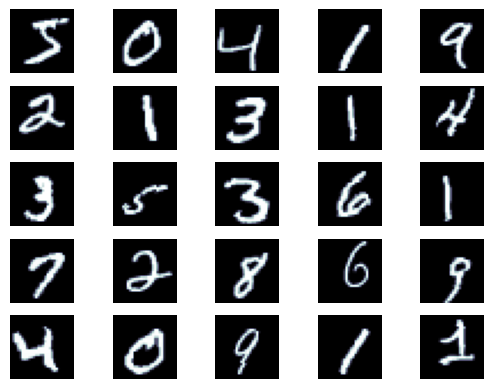

In [10]:
N_IMAGENES = 25

imagenes = [imagen for imagen, etiqueta in [data_entrenamiento[i] for i in range(N_IMAGENES)]]

visualizar_imagenes(imagenes)

El conjunto de datos MNIST viene con un conjunto de entrenamiento y prueba, pero no con un conjunto de validación. Queremos usar un conjunto de validación para verificar qué tan bien funciona nuestro modelo en datos no vistos. ¿Por qué no usamos simplemente los datos de prueba? Solo deberíamos medir nuestro rendimiento en el conjunto de prueba una vez, después de que se haya realizado todo el entrenamiento. Podemos pensar en el conjunto de validación como un conjunto de prueba proxy que podemos ver todo lo que queramos.

Además, creamos un conjunto de validación, tomando el 10% del conjunto de entrenamiento. **Nota**: el conjunto de validación siempre debe crearse a partir del conjunto de entrenamiento. Nunca tome el conjunto de validación del conjunto de prueba. Cuando los investigadores publican artículos de investigación, deben comparar el rendimiento en todo el conjunto de pruebas y la única forma de garantizar que esta sea una comparación justa es que todos los investigadores utilicen el mismo conjunto de pruebas. Si el conjunto de validación se toma del conjunto de prueba, entonces el conjunto de prueba no es el mismo que el de todos los demás y los resultados no se pueden comparar entre sí.

Primero, tenemos que definir el número exacto de ejemplos que queremos que haya en cada división de los conjuntos de entrenamiento/validación.

In [11]:
PROPORCION_VALIDACION = 0.9

n_ejemplos_entrenamiento = int(len(data_entrenamiento) * PROPORCION_VALIDACION)
n_ejemplos_validacion = len(data_entrenamiento) - n_ejemplos_entrenamiento

Luego, usamos la función `random_split` para tomar un 10% aleatorio del conjunto de entrenamiento para usarlo como conjunto de validación. El 90% restante permanecerá como conjunto de entrenamiento.

In [12]:
data_entrenamiento, data_validacion = data.random_split(data_entrenamiento,
                                           [n_ejemplos_entrenamiento, n_ejemplos_validacion])

Podemos imprimir la cantidad de ejemplos nuevamente para verificar que nuestras divisiones sean correctas.

In [13]:
print(f'Número de ejemplos de entrenamiento: {len(data_entrenamiento)}')
print(f'Número de ejemplos de validación: {len(data_validacion)}')
print(f'Número de ejemplos de prueba: {len(data_prueba)}')

Número de ejemplos de entrenamiento: 54000
Número de ejemplos de validación: 6000
Número de ejemplos de prueba: 10000


Una cosa a considerar es que, como el conjunto de validación se ha creado a partir del conjunto de entrenamiento, tiene las mismas transformaciones que el conjunto de entrenamiento, con rotación y recorte aleatorios. Como queremos que nuestro conjunto de validación actúe como un proxy para el conjunto de prueba, también debe corregirse, sin ningún aumento aleatorio.

Primero, veamos cómo se ven 25 de las imágenes dentro del conjunto de validación con las transformaciones de entrenamiento:

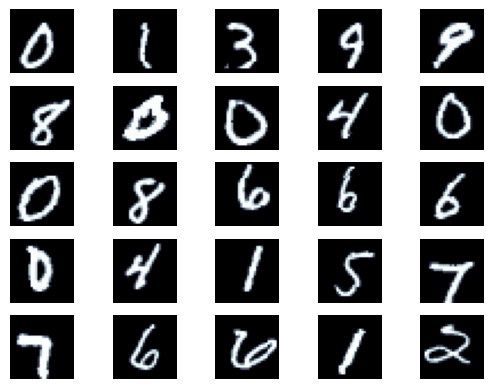

In [14]:
N_IMAGENES = 25

imagenes = [imagen for imagen, etiqueta in [data_validacion[i] for i in range(N_IMAGENES)]]

visualizar_imagenes(imagenes)

Ahora podemos simplemente reemplazar la transformación del conjunto de validación sobrescribiéndola con nuestras transformaciones de prueba de arriba.

Como el conjunto de validación es un subconjunto del conjunto de entrenamiento, si cambiamos las transformaciones de uno, entonces, por defecto, Torchvision cambiará las transformaciones del otro. Para evitar que esto suceda, hacemos una `deepcopy` de los datos de validación.

In [15]:
data_validacion = copy.deepcopy(data_validacion)
data_validacion.dataset.transform = transformaciones_prueba

Para verificar que hemos reemplazado correctamente las transformaciones de entrenamiento, podemos ver el mismo conjunto de imágenes y notar cómo están más centradas (sin recortes aleatorios) y tienen una orientación más estándar (sin rotaciones aleatorias).

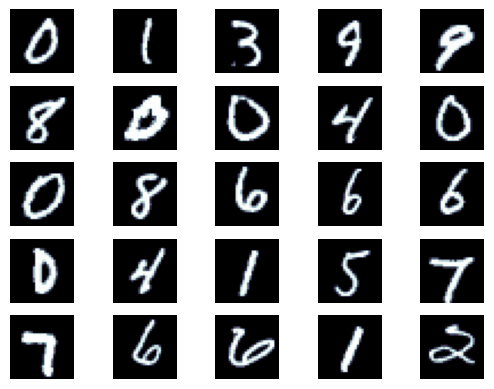

In [16]:
N_IMAGENES = 25

imagenes = [imagen for imagen, etiqueta in [data_validacion[i] for i in range(N_IMAGENES)]]

visualizar_imagenes(imagenes)

A continuación, definiremos un `DataLoader` para cada uno de los conjuntos de entrenamiento/validación/prueba. Podemos iterar sobre estos y generarán lotes de imágenes y etiquetas que podemos usar para entrenar nuestro modelo.

Solo necesitamos barajar nuestro conjunto de entrenamiento, ya que se usará para el descenso de gradiente estocástico, y queremos que cada lote sea diferente entre épocas. Como no estamos usando los conjuntos de validación o prueba para actualizar los parámetros de nuestro modelo, no es necesario mezclarlos.

Idealmente, queremos usar el tamaño de lote más grande que podamos. El 64 aquí es relativamente pequeño y se puede aumentar si nuestro hardware puede manejarlo.

In [17]:
TAMAÑO_LOTE = 64

iterador_entrenamiento = data.DataLoader(data_entrenamiento,
                                 shuffle=True,
                                 batch_size=TAMAÑO_LOTE)

iterador_validacion = data.DataLoader(data_validacion,
                                 batch_size=TAMAÑO_LOTE)

iterador_prueba = data.DataLoader(data_prueba,
                                batch_size=TAMAÑO_LOTE)

### Definir el Modelo

Nuestro modelo será una red neuronal, en concreto un perceptrón multicapa (MLP) con dos capas ocultas. La siguiente imagen muestra la arquitectura del modelo.

<center>
<img src="../figuras/mnist-mlp-8.png" width="75%">
</center>

Específicamente, primero aplanaremos nuestra imagen de 1x28x28 (1 canal de color, 28 píxeles de alto y ancho) en un vector de 784 elementos, también llamado 784 características. Aplanamos nuestra entrada, ya que los MLP no pueden manejar datos bidimensionales o tridimensionales. A continuación, la entrada de 784 dimensiones se pasa a través de la primera capa oculta para transformarla en 250 dimensiones. Luego, otra capa oculta, que la transformará a 100 dimensiones. Finalmente, una capa de salida que la transformará en un vector de 10 dimensiones. La dimensión de salida debe ser igual al número de clases dentro de sus datos. Aquí tenemos diez dígitos, 0 - 9, por lo que necesitamos que nuestra salida sea de 10 dimensiones.

La transformación entre 784 a 250, 250 a 100 y 100 a 10 dimensiones se realiza mediante capas `Linear`. Estas también se conocen como capas afines o totalmente conectadas. En estas capas, cada elemento de una capa está conectado a cada elemento de la siguiente. Podemos pensar en estos elementos como neuronas, ya que esta arquitectura está inspirada en cómo el cerebro humano está formado por millones de nodos interconectados, también llamados neuronas.

Cada conexión entre una neurona en una capa y una neurona en la siguiente tiene un *peso* asociado. La entrada a una neurona es la suma de los valores ponderados de todas las neuronas en la capa anterior conectada a ella, más un término de sesgo ponderado, donde el valor de sesgo es siempre 1. Luego, la neurona aplica una *función de activación* a esta suma ponderada. Esta función de activación es una función no lineal que permite que la red neuronal aprenda funciones no lineales entre entradas y salidas.

Definimos nuestro MLP a continuación, que consta de tres capas lineales. Primero tomamos el lote de imágenes de entrada y las aplanamos, para que puedan pasarse a las capas lineales. Luego los pasamos a través de la primera capa lineal, `fc_entrada`, que calcula la suma ponderada de las entradas, y luego aplicamos la función de activación *ReLU* (unidad lineal rectificada) por elementos. Este resultado luego se pasa a través de otra capa lineal, `fc_oculta`, nuevamente aplicando la misma función de activación por elementos. Finalmente, pasamos esto a través de la capa lineal final, `fc_salida`. Devolvemos no solo la salida, sino también la segunda capa oculta, ya que la analizaremos más adelante.

La función de activación ReLU es una función no lineal popular que es simplemente 𝑚𝑎𝑥(0,𝑥), donde 𝑥 es la suma ponderada de las entradas a esa neurona. Otras funciones de activación utilizadas son el bronceado hiperbólico (tanh) y la función sigmoidea, sin embargo, ReLU es la más utilizada.

<center>
<img src="../figuras/ReLU.png" width="50%">
</center>

Una cosa a tener en cuenta es que no usamos una función de activación en la entrada directamente o en la salida. Nunca debe usar funciones de activación directamente en la entrada, es decir, `F.relu(x)`. PyTorch combina las funciones de activación que se aplicarán en la salida con las funciones que calculan la *pérdida*, también conocida como *error* o *costo*, de una red neuronal. Esto se hace para la estabilidad numérica.

¿Por qué elegimos dimensiones ocultas de 250 y 100 elementos? ¿Por qué solo teníamos dos capas ocultas? No existe una fórmula mágica que nos diga cuántas capas usar y cuántas neuronas tener en cada capa, y lo más probable es que haya un mejor conjunto de valores. Sin embargo, la idea general es que las redes neuronales extraen características de los datos. Las capas más cercanas a la entrada aprenden a extraer características generales (p. ej., líneas, curvas, bordes), mientras que las capas posteriores combinan las características extraídas de la capa anterior en características de más alto nivel (p. ej., la intersección de dos líneas que forman una cruz, varias curvas forman una círculo). Obligamos a nuestra red neuronal a aprender estas características al reducir la cantidad de neuronas en cada capa. De esta forma, tiene que aprender a comprimir la información extrayendo solo las características útiles y generales. Por lo tanto, queremos una red neuronal con múltiples capas y algún tipo de compresión de información (reducción del número de neuronas en las capas posteriores).

In [18]:
class MLP(nn.Module):
    def __init__(self, dim_entrada, dim_salida):
        super().__init__()

        self.fc_entrada = nn.Linear(dim_entrada, 250)
        self.fc_oculta = nn.Linear(250, 100)
        self.fc_salida = nn.Linear(100, dim_salida)

    def forward(self, x):

        # x = [tamaño lote, alto, ancho]

        tamaño_lote = x.shape[0]

        x = x.view(tamaño_lote, -1)

        # x = [tamaño lote, alto * ancho]

        o_1 = F.relu(self.fc_entrada(x))

        # o_1 = [tamaño lote, 250]

        o_2 = F.relu(self.fc_oculta(o_1))

        # 0_2 = [tamaño lote, 100]

        y_pred = self.fc_salida(o_2)

        # y_pred = [tamaño lote, dim salida]

        return y_pred, o_2

Definiremos nuestro modelo creando una instancia de él y configurando las dimensiones de entrada y salida correctas.

In [34]:
DIM_ENTRADA = 28 * 28
DIM_SALIDA = 10

modelo = MLP(DIM_ENTRADA, DIM_SALIDA)

También podemos crear una pequeña función para calcular la cantidad de parámetros entrenables (pesos y sesgos) en nuestro modelo, en caso de que todos nuestros parámetros sean entrenables.

In [35]:
def countar_parametros(modelo):
    return sum(p.numel() for p in modelo.parameters() if p.requires_grad)

La primera capa tiene 784 neuronas conectadas a 250 neuronas, por lo que 784*250 conexiones ponderadas más 250 términos de sesgo.

La segunda capa tiene 250 neuronas conectadas a 100 neuronas, 250*100 conexiones ponderadas más 100 términos de sesgo.

La tercera capa tiene 100 neuronas conectadas a 10 neuronas, 100*10 conexiones ponderadas más 10 términos de sesgo.

$$784 \cdot 250 + 250 + 250 \cdot 100 + 100 + 100 \cdot 10 + 10 = 222,360 $$

In [36]:
print(f'El modelo tiene {countar_parametros(modelo):,} parámetros entrenables ')

El modelo tiene 222,360 parámetros entrenables 


### Entrenamiento del modelo

A continuación, definiremos nuestro optimizador. Este es el algoritmo que utilizaremos para actualizar los parámetros de nuestro modelo con respecto a la pérdida calculada sobre los datos.

No vamos a entrar en demasiados detalles sobre cómo se entrenan las redes neuronales (ver [este](http://neuralnetworksanddeeplearning.com/) artículo si quiere saber cómo) pero la esencia es:
- pasar un lote de datos a través de su modelo
- calcule la pérdida de su lote comparando las predicciones de su modelo con las etiquetas reales
- calcule el gradiente de cada uno de sus parámetros con respecto a la pérdida
- actualice cada uno de sus parámetros restando su gradiente multiplicado por un pequeño parámetro de *tasa de aprendizaje*

Usamos el algoritmo *Adam* con los parámetros predeterminados para actualizar nuestro modelo. Se pueden obtener mejores resultados buscando entre diferentes optimizadores y tasas de aprendizaje, sin embargo, el Adam predeterminado suele ser un buen punto de partida. Consulte [este](https://ruder.io/optimizing-gradient-descent/) artículo si desea obtener más información sobre los diferentes algoritmos de optimización comúnmente utilizados para las redes neuronales.

In [37]:
optimizador = optim.Adam(modelo.parameters())

Luego, definimos un *criterio*, el nombre de PyTorch para una función de pérdida/costo/error. Esta función tomará las predicciones de su modelo con las etiquetas reales y luego calculará la pérdida/costo/error de su modelo con sus parámetros actuales.

`CrossEntropyLoss` calcula la función de activación *softmax* en las predicciones proporcionadas, así como la pérdida real a través de *probabilidad de registro negativa*.

Brevemente, la función softmax es:

$$\text{softmax}(\mathbf{x}) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$

Esto da como resultado una salida de 10 dimensiones, donde cada elemento es un número real ilimitado, en una distribución de probabilidad sobre 10 elementos. Es decir, todos los valores están entre 0 y 1, y juntos suman 1.

¿Por qué convertimos las cosas en una distribución de probabilidad? Así que podemos usar la probabilidad logarítmica negativa para nuestra función de pérdida, ya que espera probabilidades. PyTorch calcula la probabilidad de registro negativo para un solo ejemplo a través de:

$$\text{probabilidad logarítmica negativa }(\mathbf{\hat{y}}, y) = -\log \big( \text{softmax}(\mathbf{\hat{y}})[y] \big )$$

$\mathbf{\hat{y}}$ es la salida $\mathbb{R}^{10}$ de nuestra red neuronal, mientras que $y$ es la etiqueta, un número entero que representa la clase. La pérdida es el logaritmo negativo del índice de clase del softmax. Por ejemplo:

$$\mathbf{\hat{y}} = [5,1,1,1,1,1,1,1,1,1]$$

$$\text{softmax}(\mathbf{\hat{y}}) = [0.8585, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157]$$

Si la etiqueta fuera clase cero, la pérdida sería:

$$\text{probabilidad logarítmica negativa}(\mathbf{\hat{y}}, 0) = - \log(0.8585) = 0.153 \dots$$

Si la etiqueta fuera clase cinco, la pérdida sería:

$$\text{probabilidad logarítmica negativa}(\mathbf{\hat{y}}, 5) = - \log(0.0157) = 4.154 \dots$$

Entonces, intuitivamente, a medida que aumenta la salida de su modelo correspondiente al índice de clase correcto, su pérdida disminuye.

In [38]:
criterio = nn.CrossEntropyLoss()

Luego definimos `dispositivo`. Esto se usa para colocar su modelo y datos en una GPU, si tiene una.

In [39]:
# dispositivo = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dispositivo = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

Colocamos nuestro modelo y criterio en el dispositivo usando el método `.to`.

In [40]:
modelo = modelo.to(dispositivo)
criterion = criterio.to(dispositivo)

A continuación, definiremos una función para calcular la precisión de nuestro modelo. Esto toma el índice del valor más alto para su predicción y lo compara con la etiqueta de clase real. Luego dividimos la cantidad correcta de nuestro modelo por la cantidad en el lote para calcular la precisión en todo el lote.

In [41]:
def calcular_exactitud(y_pred, y):
    mayor_pred = y_pred.argmax(1, keepdim=True)
    correcta = mayor_pred.eq(y.view_as(mayor_pred)).sum()
    exactitud = correcta.float() / y.shape[0]
    return exactitud

Finalmente definimos nuestro ciclo de entrenamiento.

Pasos del entrenamiento:
- poner nuestro modelo en modo `train`
- iterar sobre nuestro cargador de datos, devolviendo lotes de (imagen, etiqueta)
- coloque el lote en nuestra GPU, si tenemos una
- borrar los gradientes calculados a partir del último lote
- pasar nuestro lote de imágenes, `x`, al modelo para obtener predicciones, `y_pred`
- calcular la pérdida entre nuestras predicciones y las etiquetas reales
- calcular la precisión entre nuestras predicciones y las etiquetas reales
- calcular los gradientes de cada parámetro
- actualizar los parámetros dando un paso optimizador
- actualizar nuestras métricas

Algunas capas actúan de manera diferente cuando entrenan y evalúan el modelo que las contiene, por lo que debemos decirle a nuestro modelo que estamos en modo de "entrenamiento". El modelo que estamos usando aquí no usa ninguna de esas capas, sin embargo, es una buena práctica acostumbrarse a poner su modelo en modo de entrenamiento.

In [42]:
def entrenar(modelo, iterador, optimizador, criterio, dispositivo):

    perdida_epoca = 0
    exactitud_epoca = 0

    modelo.train()

    for (x, y) in tqdm(iterador, desc="Entrenamiento", leave=False):

        x = x.to(dispositivo)
        y = y.to(dispositivo)

        optimizador.zero_grad()

        y_pred, _ = modelo(x)

        perdida = criterio(y_pred, y)

        exactitud = calcular_exactitud(y_pred, y)

        perdida.backward()

        optimizador.step()

        perdida_epoca += perdida.item()
        exactitud_epoca += exactitud.item()

    return perdida_epoca / len(iterador), exactitud_epoca / len(iterador)

El ciclo de evaluación es similar al ciclo de entrenamiento. Las diferencias son:
- ponemos nuestro modelo en modo de evaluación con `model.eval()`
- envolvemos las iteraciones dentro de `with torch.no_grad()`
- no hacemos gradientes cero ya que no estamos calculando ninguno
- no calculamos gradientes ya que no estamos actualizando parámetros
- no damos un paso optimizador ya que no estamos calculando gradientes

`torch.no_grad()` asegura que los gradientes no se calculen para lo que sea que esté dentro del bloque `with`. Como nuestro modelo no tendrá que calcular gradientes, será más rápido y usará menos memoria.

In [43]:
def evaluar(modelo, iterador, criterio, dispositivo):

    perdida_epoca = 0
    exactitud_epoca = 0

    modelo.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterador, desc="Evaluando", leave=False):

            x = x.to(dispositivo)
            y = y.to(dispositivo)

            y_pred, _ = modelo(x)

            perdida = criterio(y_pred, y)

            exactitud = calcular_exactitud(y_pred, y)

            perdida_epoca += perdida.item()
            exactitud_epoca += exactitud.item()

    return perdida_epoca / len(iterador), exactitud_epoca / len(iterador)

El paso final antes del entrenamiento es definir una pequeña función que nos diga cuánto tiempo tomó una época.

In [44]:
def duracion_epoca(tiempo_inicio, tiempo_final):
    tiempo_transcurrido = tiempo_final - tiempo_inicio
    mins_transcurrido = int(tiempo_transcurrido / 60)
    segs_transcurrido = int(tiempo_transcurrido - (mins_transcurrido * 60))
    return mins_transcurrido, segs_transcurrido

¡Por fin estamos listos para entrenar!

Durante cada época calculamos la pérdida de entrenamiento y la exactitud, seguido de la pérdida de validación y la exactitud. Luego verificamos si la pérdida de validación lograda es la mejor pérdida de validación que hemos visto. Si es así, guardamos los parámetros de nuestro modelo (llamados `state_dict`).

In [45]:
EPOCAS = 10

mejor_perdida_validacion = float('inf')

for epoca in trange(EPOCAS):

    tiempo_inicio = time.monotonic()

    perdida_entrenamiento, exactitud_entrenamiento = entrenar(modelo, iterador_entrenamiento, optimizador, criterio, dispositivo)
    perdida_validacion, exactitud_validacion = evaluar(modelo, iterador_validacion, criterio, dispositivo)

    if perdida_validacion < mejor_perdida_validacion:
        mejor_perdida_validacion = perdida_validacion
        torch.save(modelo.state_dict(), 'tut1-modelo.pt')

    tiempo_final = time.monotonic()

    mins_epoca, secs_epoca = duracion_epoca(tiempo_inicio, tiempo_final)

    print(f'Epoca: {epoca+1:02} | Tiempo Epoca: {mins_epoca}m {secs_epoca}s')
    print(f'\t Perdida Entrenamiento: {perdida_entrenamiento:.3f} | Exactitud Entrenamiento: {exactitud_entrenamiento*100:.2f}%')
    print(f'\t Perdida Validacion: {perdida_validacion:.3f} |  Exactitud Validacion: {exactitud_validacion*100:.2f}%')

  0%|          | 0/10 [00:00<?, ?it/s]

Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 01 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.410 | Exactitud Entrenamiento: 87.31%
	 Perdida Validacion: 0.159 |  Exactitud Validacion: 95.33%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 02 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.173 | Exactitud Entrenamiento: 94.66%
	 Perdida Validacion: 0.124 |  Exactitud Validacion: 96.15%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 03 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.136 | Exactitud Entrenamiento: 95.78%
	 Perdida Validacion: 0.095 |  Exactitud Validacion: 97.17%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 04 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.120 | Exactitud Entrenamiento: 96.29%
	 Perdida Validacion: 0.086 |  Exactitud Validacion: 97.34%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 05 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.106 | Exactitud Entrenamiento: 96.73%
	 Perdida Validacion: 0.082 |  Exactitud Validacion: 97.42%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 06 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.096 | Exactitud Entrenamiento: 97.05%
	 Perdida Validacion: 0.102 |  Exactitud Validacion: 97.13%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 07 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.092 | Exactitud Entrenamiento: 97.16%
	 Perdida Validacion: 0.074 |  Exactitud Validacion: 97.97%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 08 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.085 | Exactitud Entrenamiento: 97.35%
	 Perdida Validacion: 0.074 |  Exactitud Validacion: 97.88%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 09 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.082 | Exactitud Entrenamiento: 97.35%
	 Perdida Validacion: 0.081 |  Exactitud Validacion: 97.67%


Entrenamiento:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluando:   0%|          | 0/94 [00:00<?, ?it/s]

Epoca: 10 | Tiempo Epoca: 0m 9s
	 Perdida Entrenamiento: 0.080 | Exactitud Entrenamiento: 97.45%
	 Perdida Validacion: 0.080 |  Exactitud Validacion: 97.91%


Luego, cargamos nuestros parámetros del modelo que logró la mejor pérdida de validación y luego usamos esto para evaluar nuestro modelo en el conjunto de prueba.

In [47]:
modelo.load_state_dict(torch.load('tut1-modelo.pt'))

perdida_prueba, exactitud_prueba = evaluar(modelo, iterador_prueba, criterio, dispositivo)

Evaluando:   0%|          | 0/157 [00:00<?, ?it/s]

In [48]:
print(f'Perdida Prueba: {perdida_prueba:.3f} | Exactitud Prueba: {exactitud_prueba*100:.2f}%')

Perdida Prueba: 0.059 | Exactitud Prueba: 98.04%


Nuestro modelo logra una precisión del 98% en el conjunto de prueba.

Esto se puede mejorar modificando los hiperparámetros, número de capas, número de neuronas por capa, algoritmo de optimización utilizado, tasa de aprendizaje, etc.

### Examinando el Modelo

Ahora que hemos entrenado nuestro modelo, hay algunas cosas que podemos ver. La mayoría de estos son análisis exploratorios simples, pero pueden ofrecer algunas ideas sobre su modelo.

Una cosa importante que debe hacer es verificar qué ejemplos se equivocan en su modelo y asegurarse de que sean errores razonables.

La siguiente función devolverá las predicciones del modelo sobre un conjunto de datos determinado. Devolverá las entradas (imagen), las salidas (predicciones del modelo) y las etiquetas reales.

In [49]:
def obtener_predicciones(modelo, iterador, dispositivo):

    modelo.eval()

    imagenes = []
    etiquetas = []
    probabilidades = []

    with torch.no_grad():

        for (x, y) in iterador:

            x = x.to(dispositivo)

            y_pred, _ = modelo(x)

            y_prob = F.softmax(y_pred, dim=-1)

            imagenes.append(x.cpu())
            etiquetas.append(y.cpu())
            probabilidades.append(y_prob.cpu())

    imagenes = torch.cat(imagenes, dim=0)
    etiquetas = torch.cat(etiquetas, dim=0)
    probabilidades = torch.cat(probabilidades, dim=0)

    return imagenes, etiquetas, probabilidades

Entonces podemos obtener estas predicciones y, al tomar el índice de la mayor probabilidad predicha, obtener las etiquetas predichas.

In [51]:
imagenes, etiquetas, probabilidades = obtener_predicciones(modelo, iterador_prueba, dispositivo)

etiquetas_predichas = torch.argmax(probabilidades, 1)

Luego, podemos hacer una matriz de confusión a partir de nuestras etiquetas reales y nuestras etiquetas predichas.

In [52]:
def graficar_matriz_confusion(etiquetas, etiquetas_predichas):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(etiquetas, etiquetas_predichas)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

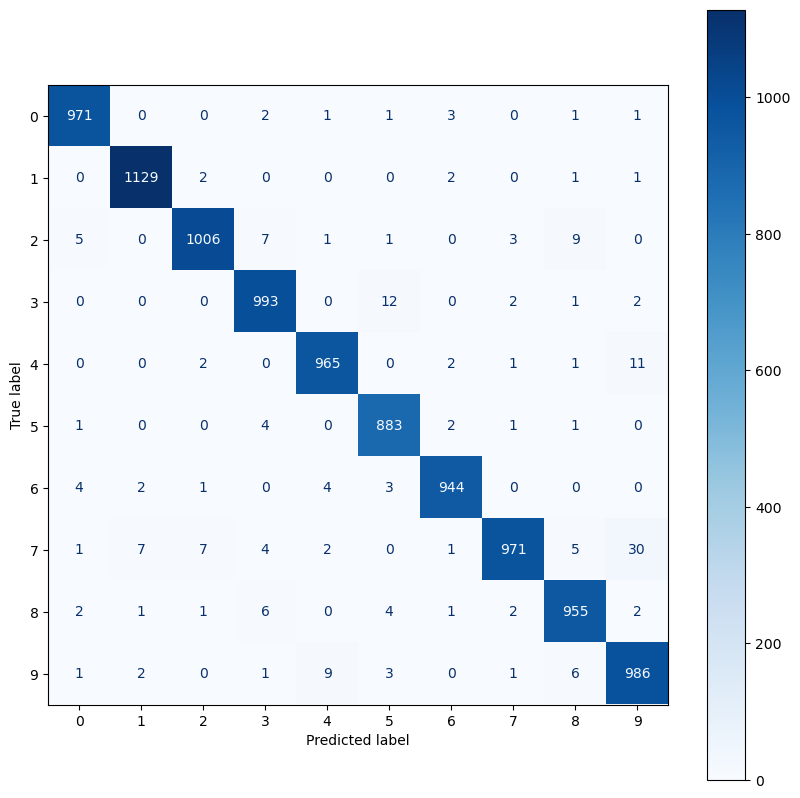

In [53]:
graficar_matriz_confusion(etiquetas, etiquetas_predichas)

Los resultados parecen bastante razonables, las predicciones-actuales más confusas son: 7-9 y 3-5.

A continuación, para cada uno de nuestros ejemplos, podemos verificar si nuestra etiqueta predicha coincide con nuestra etiqueta real.

In [58]:
correctos = torch.eq(etiquetas, etiquetas_predichas)
correctos.sum()

tensor(9803)

In [59]:
ejemplos_incorrectos = []

for imagen, etiqueta, probabilidad, correcto in zip(imagenes, etiquetas, probabilidades, correctos):
    if not correcto:
        ejemplos_incorrectos.append((imagen, etiqueta, probabilidad))

ejemplos_incorrectos.sort(reverse=True,
                        key=lambda x: torch.max(x[2], dim=0).values)

Luego podemos trazar las imágenes pronosticadas incorrectamente junto con la confianza que tenían en la etiqueta real y la confianza que tenían en la etiqueta incorrecta.

In [66]:
def graficar_mas_incorrectos(incorrectos, n_imagenes):

    filas = int(np.sqrt(n_imagenes))
    columnas = int(np.sqrt(n_imagenes))

    fig = plt.figure(figsize=(20, 10))
    for i in range(filas*columnas):
        ax = fig.add_subplot(filas, columnas, i+1)
        imagen, etiqueta_real, probabilidades = incorrectos[i]
        probabilidad_real = probabilidades[etiqueta_real]
        probabilidad_incorrecta, etiqueta_incorrecta = torch.max(probabilidades, dim=0)
        ax.imshow(imagen.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'etiqueta real: {etiqueta_real} ({probabilidad_real:.3f})\n'
                     f'etiqueta predicha: {etiqueta_incorrecta} ({probabilidad_incorrecta:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace=0.5)

A continuación, podemos ver las 25 imágenes que el modelo obtuvo incorrectamente y en las que tenía más confianza.

Muchos de estos dígitos son irregulares, por lo que es difícil que el modelo lo haga bien. Las imágenes que se ven bien, si entrecierras los ojos puedes ver por qué el modelo se equivocó.

¿Por qué la red neuronal confía tanto en los dígitos irregulares? Seguramente, si se trata de un dígito de aspecto extraño, la salida del softmax debería estar casi distribuida uniformemente en unos pocos dígitos de los que el modelo no está seguro, ¿verdad? Bueno no. El modelo ha sido entrenado para tener una confianza increíble en sus predicciones y, por lo tanto, cuando ve una imagen, siempre tendrá confianza en lo que es.

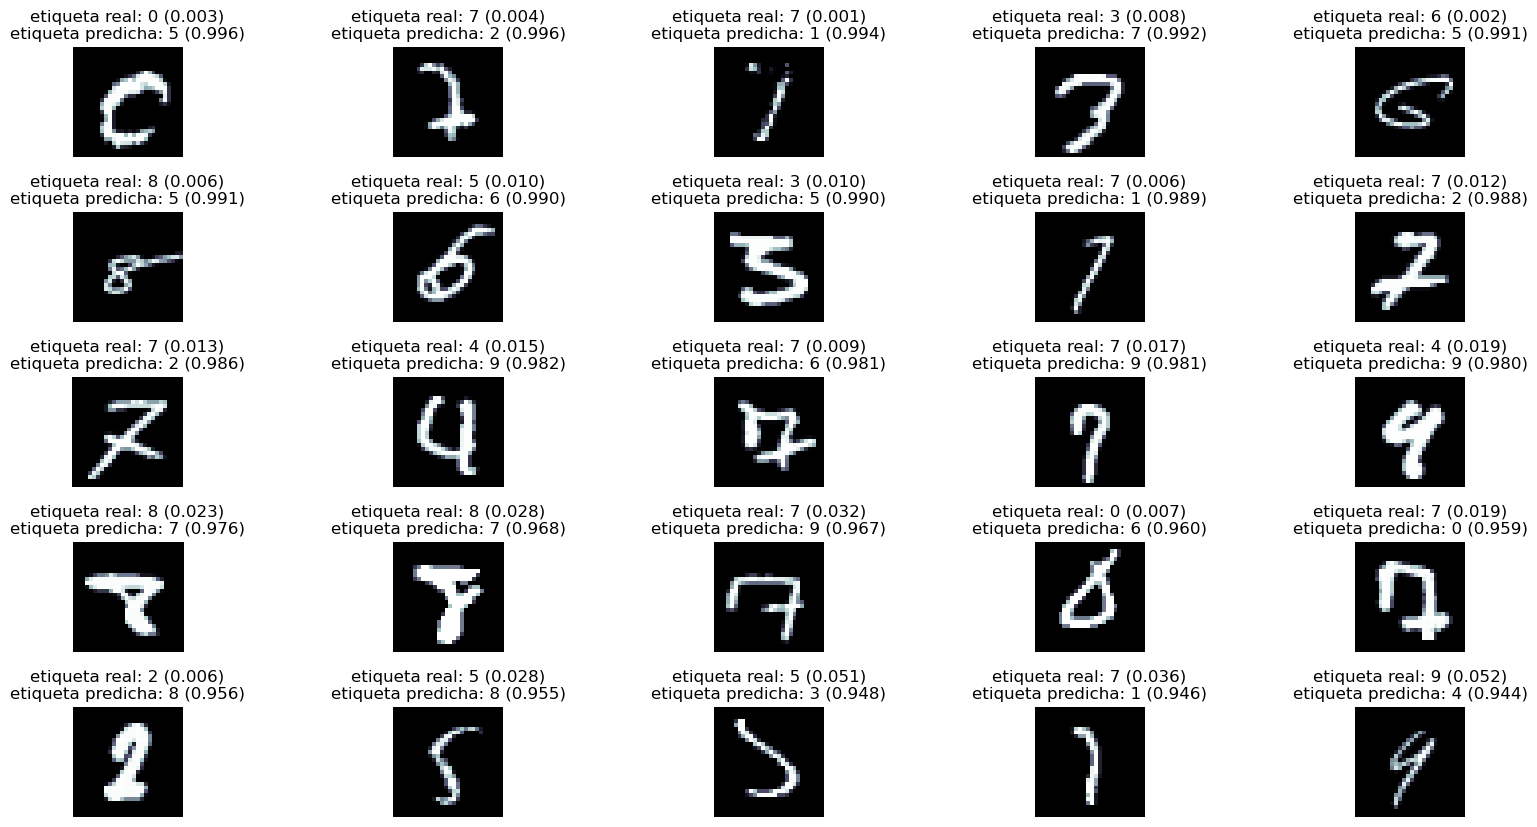

In [67]:
N_IMAGENES = 25

graficar_mas_incorrectos(ejemplos_incorrectos, N_IMAGENES)